Objective: Predict chances of admission based on student academic and profile factors.

In [27]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/University Admission Prediction.csv")

In [28]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Unnamed: 9,Unnamed: 10
0,1,337,118,4,4.5,4.5,9.65,1,0.92,NaN,NaN
1,2,324,107,4,4.0,4.5,8.87,1,0.76,NaN,NaN
2,3,316,104,3,3.0,3.5,8.00,1,0.72,NaN,NaN
3,4,322,110,3,3.5,2.5,8.67,1,0.80,NaN,NaN
4,5,314,103,2,2.0,3.0,8.21,0,0.65,NaN,NaN


2. Understand the dataset

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
 9   Unnamed: 9         0 non-null      float64
 10  Unnamed: 10        0 non-null      float64
dtypes: float64(6), int64(5)
memory usage: 34.5 KB


In [45]:
df.shape

(400, 8)

3. Data Cleaning

In [30]:
df.drop(['Unnamed: 9', 'Unnamed: 10'], axis=1, inplace=True)

In [31]:
df.drop(['Serial No.'], axis=1, inplace=True)

In [32]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [33]:
df.columns = df.columns.str.strip()

In [34]:
df.rename(columns={'Chance of Admit': 'Chance_of_Admit'}, inplace=True)

In [35]:
print(df.columns)

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')


In [36]:
df.isnull().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance_of_Admit,0


4. Exploratory Data Analysis

(i) Visualize Distribution of Chance_of_Admit

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

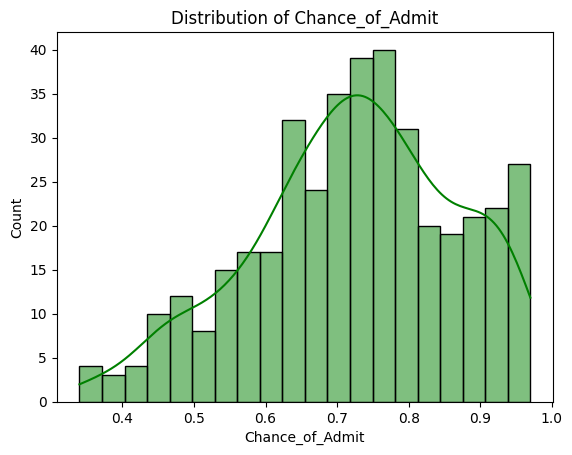

In [38]:
sns.histplot(df['Chance_of_Admit'], kde=True, bins=20, color='green')
plt.title("Distribution of Chance_of_Admit")
plt.xlabel("Chance_of_Admit")
plt.show()

Insights: It is slightly right-skewed so many have lower chances. Most students have a chance of admit between 0.65 to 0.80.


To find high correlation of Chance of Admit with features like CGPA, GRE Score, Research using heat map

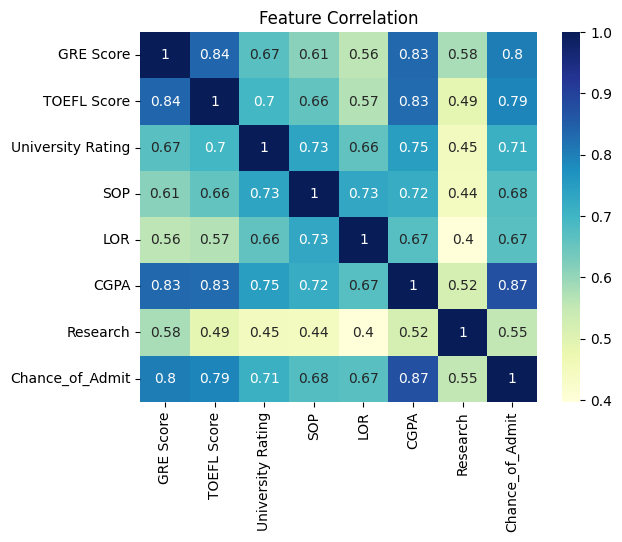

In [39]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title("Feature Correlation")
plt.show()

5. Finding Outliers

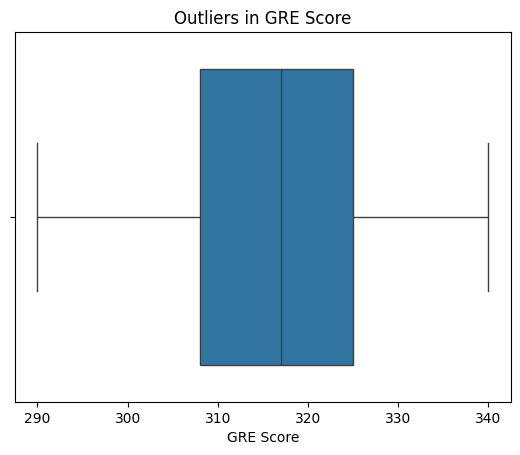

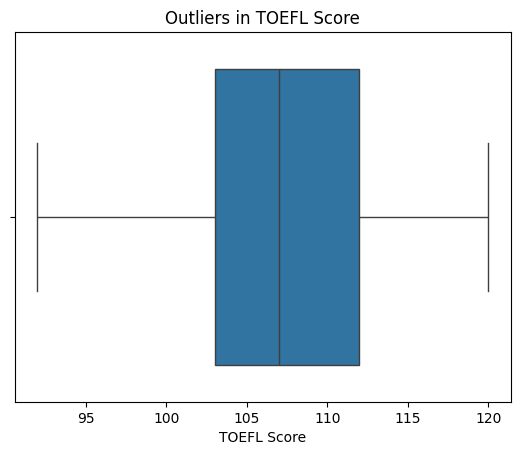

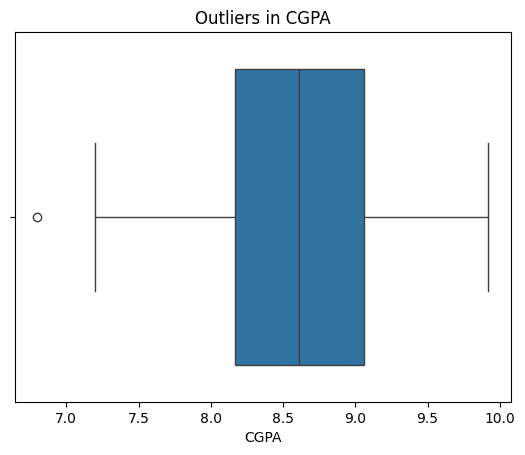

In [40]:
# GREScore
sns.boxplot(x=df['GRE Score'])
plt.title("Outliers in GRE Score")
plt.show()
# TOEFL Score
sns.boxplot(x=df['TOEFL Score'])
plt.title("Outliers in TOEFL Score")
plt.show()
## CGPA
sns.boxplot(x=df['CGPA'])
plt.title("Outliers in CGPA")
plt.show()

Insights :
1. If a Student's CGPA is >= 8.5 there are more chances of admission
2. If a student's GRE score is >= 320 then there are high chances of admission
3. If a student's TOEFL score is >= 110 then there is an added advantage and chances of admission.

* 6. Test train Split Data into X and Y

In [41]:
from sklearn.model_selection import train_test_split

## Features(X) and Target(Y)
X = df.drop('Chance_of_Admit',axis = 1)# Feature drops the target column
Y = df['Chance_of_Admit']# Target variable

In [42]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [43]:
##Split the data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [44]:
print("training_set_shape:",X_train.shape)
print("test_set_shape:",X_test.shape)
print("training_set_shape:",Y_train.shape)
print("test_set_shape:",Y_test.shape)

training_set_shape: (320, 7)
test_set_shape: (80, 7)
training_set_shape: (320,)
test_set_shape: (80,)
